In [25]:
# -*- coding:utf-8 -*-
import cv2
import matplotlib.pyplot as plt
import numpy as np
def show_rgb(img):
    img_2 = img[:,:,::-1]
    plt.imshow(img_2)
    plt.show()
def show(img):
    plt.imshow(img,cmap='gray')
    plt.show()
img = cv2.imread('413.jpg')

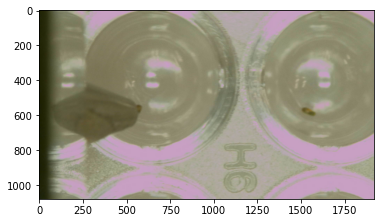

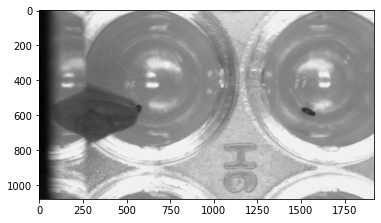

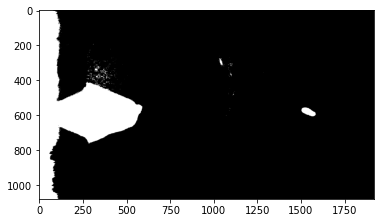

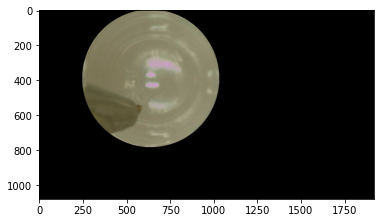

In [48]:
# cam = cv2.VideoCapture(1, cv2.CAP_DSHOW)
# cam.set(3,1920)
# cam.set(4,1080)
# ret, img = cam.read()
# img = cv2.imread("./img/2.jpg")
# show_rgb(img)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
show_rgb(img)
img_b, img_g, img_r= cv2.split(img)
show(img_b)
# cv2.imwrite('./img/img_b.jpg', img_b)
# cv2.imwrite('./img/img_g.jpg', img_g)
# cv2.imwrite('./img/img_r.jpg', img_r)
# reverse
img_rev = 255 - img_b
# cv2.imwrite('./img/img_rev.jpg', img_rev)
# gaussian blur
# img_blur = cv2.GaussianBlur(img_rev,(3,3),0)
img_blur = img_rev
# cv2.imwrite('./img/img_blur.jpg', img_blur)
# ret,img_th = cv2.threshold(img_blur,155,255,cv2.THRESH_BINARY)
ret, img_th = cv2.threshold(img_blur,170,255,cv2.THRESH_BINARY)
show(img_th)
# print(ret)
# cv2.imwrite('./img/img_th.jpg', img_th)
circles = cv2.HoughCircles(img_rev,cv2.HOUGH_GRADIENT,1,600,
                            param1=50,param2=50,minRadius=300,maxRadius=500)
circles = np.uint16(np.around(circles))
img_draw = img.copy()
# for i in circles[0,:]:
#     cv2.circle(img_draw,(i[0],i[1]),i[2],(0,255,0),2)
#     cv2.circle(img_draw,(i[0],i[1]),2,(0,0,255),3)
# show_rgb(img_draw)
min = np.argmin(circles[0,:], axis=0)[0]
circle = circles[0,:][min]
mask = np.full(img.shape[:2], 0, dtype=np.uint8)
mask = cv2.circle(mask, (circle[0], circle[1]), circle[2], (255, 255, 255),-1)
img_draw = cv2.bitwise_and(img_draw, img_draw, mask=mask);
show_rgb(img_draw)

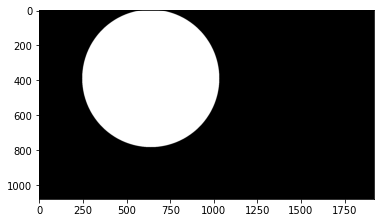

In [45]:
show(mask)

In [22]:
circles[0,:]

array([[1684,  392,  391],
       [ 646,  394,  393]], dtype=uint16)